In [1]:
# Imports
import numpy as np 
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix

In [2]:
# Convolution Layer
G= karate_club_graph()
order = sorted(list(G.nodes()))
#nx.draw(G, with_labels=True)
A = nx.to_numpy_matrix(G, nodelist=order)
I = np.eye(G.number_of_nodes())
A_own = A + I
D_own = np.array(np.sum(A_own, axis=0))[0]
D_inv=D_own**-1
D_inv = np.matrix(np.diag(D_inv))
W1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 6))
W2 = np.random.normal(loc=0, size=(W1.shape[1], 3))
def gcn_layer(A, D, X, W):
    feature=D* A * X * W
    feature=np.maximum(0,feature)
    return feature
H1 = gcn_layer(A_own, D_inv, I, W1)
H2 = gcn_layer(A_own, D_inv, H1, W2)
H2

matrix([[0.21936788, 0.5698164 , 0.        ],
        [0.21269829, 0.556726  , 0.02432993],
        [0.2118979 , 0.66616062, 0.        ],
        [0.57553216, 0.66165675, 0.        ],
        [0.        , 0.41515024, 0.        ],
        [0.        , 0.40579205, 0.        ],
        [0.        , 0.44803202, 0.        ],
        [0.48475493, 0.61410512, 0.0020724 ],
        [0.        , 0.51618729, 0.        ],
        [0.1069868 , 0.5680868 , 0.        ],
        [0.00563114, 0.23192832, 0.        ],
        [0.00368349, 0.34594619, 0.        ],
        [0.67529436, 0.78574623, 0.        ],
        [0.27105499, 0.48173382, 0.        ],
        [0.        , 0.44602328, 0.        ],
        [0.        , 0.35239226, 0.        ],
        [0.        , 0.48570818, 0.        ],
        [0.20435272, 0.55411648, 0.        ],
        [0.        , 0.42867244, 0.        ],
        [0.03356856, 0.32253202, 0.03162987],
        [0.        , 0.43565945, 0.        ],
        [0.        , 0.79274348, 0

the number of components 1
The Number of Nodes :  15
[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
---------
The Number of Nodes :  19
[2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
---------


array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

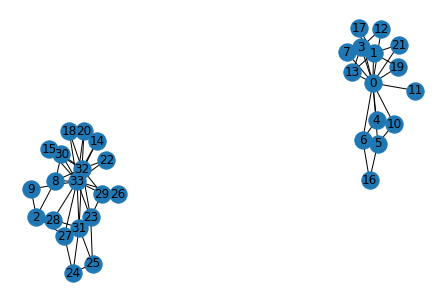

In [6]:
#Community Detection

# remove edge to construct subgraphs
def edge_to_remove(G):
    dict1=nx.edge_betweenness_centrality(G)
    list_of_tuples=dict1.items()
    list_of_tuples=sorted(list_of_tuples,key=lambda X:X[1],reverse=True)
    return list_of_tuples[0][0]

#Girvan Algorithm
def girvan(G):
    c=list(nx.connected_component_subgraphs(G))
    l=len(c)
    print("the number of components",l)
    while(l==1):
        G.remove_edge(*edge_to_remove(G))
        c=list(nx.connected_component_subgraphs(G))
        l=len(c)
        #print("the number of components",l)
    return c

G= nx.karate_club_graph()
#print("Main Graph")
#nx.draw(G, with_labels=True)
c=girvan(G)
#print("Communities")
nx.draw(G, with_labels=True)

#preperation of class label
y=np.zeros((G.number_of_nodes(),1))
#print("------------")
k=0
for i in c:
    g1=list(i.nodes())
    for j in range(i.number_of_nodes()):
        y[g1[j]]=k
    print("The Number of Nodes : ",i.number_of_nodes())
    print(i.nodes())
    print("---------")
    k=k+1
y

In [4]:
# Fully Connected Neural Network

# Class definition
class FullyConnectedNeuralNetwork:
    def __init__(self, x,y):
        self.input = np.array(x)
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
        
    # Activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    # Derivative of sigmoid
    def sigmoid_derivative(self, x):
        return (x * (1 - x))  
    
    #Feed Forward
    def feedforward(self):
        self.layer1 = self.sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = self.sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
    
    #Backpropagation 
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*self.sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*self.sigmoid_derivative(self.output), self.weights2.T)*self.sigmoid_derivative(self.layer1))
    
        self.weights1 += d_weights1
        self.weights2 += d_weights2

    #Train
    def train(self):
        for i in range(50000):
            self.output = self.feedforward()
            self.backprop()
        
        print("Weights1:")
        print(self.weights1)
        print("-------------")
        print("Weights2:")
        print(self.weights2)
        print("-------------")
        print("Output:")
        print(self.output)
        print("Actual Output:")
        print(self.y)
        

In [7]:
nn=FullyConnectedNeuralNetwork(H2,y)
nn.train()

Weights1:
[[-17.88254237  21.07710122  20.58310382  21.17108142]
 [ -0.08712316 -11.59907653  -1.53676189 -11.6548748 ]
 [-20.25869045   0.93169008  14.6854783    0.94191562]]
-------------
Weights2:
[[ -2.17995718]
 [-64.8143126 ]
 [  8.25346409]
 [-72.18491846]]
-------------
Output:
[[7.94107761e-05]
 [5.14182019e-05]
 [9.15146935e-01]
 [4.55592052e-56]
 [5.53350042e-01]
 [5.29386998e-01]
 [6.13300289e-01]
 [2.75977065e-54]
 [6.60899797e-01]
 [9.81442039e-01]
 [5.05287032e-04]
 [2.83871929e-01]
 [2.22910164e-56]
 [1.57277878e-29]
 [6.10554332e-01]
 [3.19926248e-01]
 [6.48683107e-01]
 [5.09507842e-04]
 [5.82167562e-01]
 [1.17544045e-01]
 [5.94661027e-01]
 [5.65311884e-01]
 [5.15479257e-01]
 [5.44631480e-01]
 [9.99689437e-01]
 [9.81374149e-01]
 [9.48175183e-01]
 [9.99158226e-01]
 [9.98982236e-01]
 [9.94480750e-01]
 [6.61805526e-01]
 [8.34630907e-01]
 [7.77433068e-01]
 [6.30860153e-01]]
Actual Output:
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 